In [8]:
#Load packages
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import plotly.express as px

## Part 1: Rule-based Sentiment analysis using VADER

In [9]:
#Load previously created data of oba, wsj and nyt - see nrcEmotionAnalysis.ipynb
data = pd.read_csv('./Data/genData/nonEmotiondata.csv')
data.head(3)

,Unnamed: 0,file,text_oba,text_wsj,text_nyt,date
0,0,2004-07-28-DNCSpeech.txt,"On behalf of the great state of Illinois, cros...",John Kerry's decorated service in Vietnam took...,Barack Obama took the dais as the keynote spea...,2004-07-28
1,1,2008-06-04-ObamaNomination.txt,Thank you....Thank you. What a -- What a wonde...,Sen. Barack Obama captured enough convention d...,Senator Barack Obama claimed the Democratic pr...,2008-06-04
2,2,2008-11-05-ObamaElected.txt,"Hello, Chicago.\n\nIf there is anyone out ther...",Sen. Barack Obama was elected the nation's fir...,Barack Hussein Obama was elected the 44th pres...,2008-11-05


In [10]:
data['oba_scores']=0
data['wsj_scores']=0
data['nyt_scores']=0
for i in range(0,len(data)):
    data['oba_scores'][i]=analyzer.polarity_scores(data.iloc[i,2])
    data['wsj_scores'][i]=analyzer.polarity_scores(data.iloc[i,3])
    data['nyt_scores'][i]=analyzer.polarity_scores(data.iloc[i,4])
#Calculating scores with vader and adding them to the df


C:\Users\Kylan\AppData\Local\Temp\ipykernel_22360\3916138746.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['oba_scores'][i]=analyzer.polarity_scores(data.iloc[i,2])
C:\Users\Kylan\AppData\Local\Temp\ipykernel_22360\3916138746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['wsj_scores'][i]=analyzer.polarity_scores(data.iloc[i,3])
C:\Users\Kylan\AppData\Local\Temp\ipykernel_22360\3916138746.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [11]:
data.head()
#Checking that the scores have been implemented properly

,Unnamed: 0,file,text_oba,text_wsj,text_nyt,date,oba_scores,wsj_scores,nyt_scores
0,0,2004-07-28-DNCSpeech.txt,"On behalf of the great state of Illinois, cros...",John Kerry's decorated service in Vietnam took...,Barack Obama took the dais as the keynote spea...,2004-07-28,"{'neg': 0.07, 'neu': 0.749, 'pos': 0.181, 'com...","{'neg': 0.111, 'neu': 0.787, 'pos': 0.102, 'co...","{'neg': 0.038, 'neu': 0.815, 'pos': 0.147, 'co..."
1,1,2008-06-04-ObamaNomination.txt,Thank you....Thank you. What a -- What a wonde...,Sen. Barack Obama captured enough convention d...,Senator Barack Obama claimed the Democratic pr...,2008-06-04,"{'neg': 0.063, 'neu': 0.76, 'pos': 0.177, 'com...","{'neg': 0.041, 'neu': 0.812, 'pos': 0.147, 'co...","{'neg': 0.05, 'neu': 0.816, 'pos': 0.133, 'com..."
2,2,2008-11-05-ObamaElected.txt,"Hello, Chicago.\n\nIf there is anyone out ther...",Sen. Barack Obama was elected the nation's fir...,Barack Hussein Obama was elected the 44th pres...,2008-11-05,"{'neg': 0.066, 'neu': 0.758, 'pos': 0.176, 'co...","{'neg': 0.075, 'neu': 0.812, 'pos': 0.113, 'co...","{'neg': 0.066, 'neu': 0.82, 'pos': 0.114, 'com..."
3,3,2009-01-05-EconomyPlans.txt,"All right. Well, thanks for taking the time to...",President-elect Barack Obama and congressional...,President-elect Barack Obama plans to include ...,2009-01-05,"{'neg': 0.072, 'neu': 0.856, 'pos': 0.072, 'co...","{'neg': 0.059, 'neu': 0.816, 'pos': 0.124, 'co...","{'neg': 0.046, 'neu': 0.872, 'pos': 0.082, 'co..."
4,4,2009-01-20-Inauguration.txt,"I, Barack Hussein Obama, do solemnly swear tha...","On a day rich in history, Barack Obama was swo...",Barack Hussein Obama was sworn in as the 44th ...,2009-01-20,"{'neg': 0.105, 'neu': 0.711, 'pos': 0.184, 'co...","{'neg': 0.085, 'neu': 0.811, 'pos': 0.105, 'co...","{'neg': 0.083, 'neu': 0.813, 'pos': 0.104, 'co..."


In [12]:
oba_pos=[]
oba_neu=[]
oba_neg=[]
wsj_pos=[]
wsj_neu=[]
wsj_neg=[]
nyt_pos=[]
nyt_neu=[]
nyt_neg=[]
for i in range(0,len(data)):
    oba_pos.append(data['oba_scores'][i].get('pos'))
    oba_neu.append(data['oba_scores'][i].get('neu'))
    oba_neg.append(data['oba_scores'][i].get('neg'))
    wsj_pos.append(data['wsj_scores'][i].get('pos'))
    wsj_neu.append(data['wsj_scores'][i].get('neu'))
    wsj_neg.append(data['wsj_scores'][i].get('neg'))
    nyt_pos.append(data['nyt_scores'][i].get('pos'))
    nyt_neu.append(data['nyt_scores'][i].get('neu'))
    nyt_neg.append(data['nyt_scores'][i].get('neg'))
#This is super verbose and could actually be done nicely through the use of dataframes, clean up required later

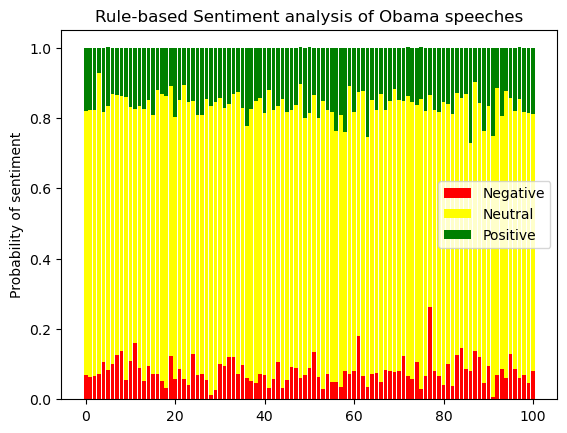

In [13]:
x=data.index
plt.bar(x,oba_neg,color='red',label='Negative')
plt.bar(x,oba_neu,bottom=oba_neg,color='yellow',label='Neutral')
plt.bar(x,oba_pos,bottom=[sum(x) for x in zip(oba_neu,oba_neg)],color='green',label='Positive')
plt.ylabel('Probability of sentiment')
plt.title('Rule-based Sentiment analysis of Obama speeches')
plt.legend(loc='best')
plt.show()

In [14]:
#Create dataframe for plotting obama data using plotly
oba_bardata=pd.DataFrame({'oba_neg':oba_neg,'oba_neu':oba_neu,'oba_pos':oba_pos},index=data['date'])
oba_bardata.head()

,oba_neg,oba_neu,oba_pos
date,,,
2004-07-28,0.070,0.749,0.181
2008-06-04,0.063,0.760,0.177
2008-11-05,0.066,0.758,0.176
2009-01-05,0.072,0.856,0.072
2009-01-20,0.105,0.711,0.184


In [15]:
#Tail to remove the first obs which is from 2004 and messes with the plot
#You can change between px.line, px.bar (difficult to see) and px.histogram (messy aggregation)

fig=px.line(oba_bardata.tail(-1),x=oba_bardata.tail(-1).index,y=['oba_neg','oba_neu','oba_pos'])
fig.show()

## Part 2: Sentiment analysis using pre-trained BERTweet-based model

In [16]:
!pip install tensorflow==2.10 -force-reinstall

Looking in links: orce-reinstall



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
#New libraries and load sentiment model through HF pipeline
from pysentimiento import create_analyzer
from transformers import pipeline
from nltk import tokenize 
from gensim.models import Doc2Vec
import nltk
model=pipeline('sentiment-analysis',model='finiteautomata/bertweet-base-sentiment-analysis')

In [18]:
#Reload original dataframe
data = pd.read_csv('./Data/genData/nonEmotiondata.csv')
data.head()

,Unnamed: 0,file,text_oba,text_wsj,text_nyt,date
0,0,2004-07-28-DNCSpeech.txt,"On behalf of the great state of Illinois, cros...",John Kerry's decorated service in Vietnam took...,Barack Obama took the dais as the keynote spea...,2004-07-28
1,1,2008-06-04-ObamaNomination.txt,Thank you....Thank you. What a -- What a wonde...,Sen. Barack Obama captured enough convention d...,Senator Barack Obama claimed the Democratic pr...,2008-06-04
2,2,2008-11-05-ObamaElected.txt,"Hello, Chicago.\n\nIf there is anyone out ther...",Sen. Barack Obama was elected the nation's fir...,Barack Hussein Obama was elected the 44th pres...,2008-11-05
3,3,2009-01-05-EconomyPlans.txt,"All right. Well, thanks for taking the time to...",President-elect Barack Obama and congressional...,President-elect Barack Obama plans to include ...,2009-01-05
4,4,2009-01-20-Inauguration.txt,"I, Barack Hussein Obama, do solemnly swear tha...","On a day rich in history, Barack Obama was swo...",Barack Hussein Obama was sworn in as the 44th ...,2009-01-20


In [19]:
#Create pysentimiento sentiment analyzer
analyzer=create_analyzer(task='sentiment',lang='en')

In [20]:
#Try to get results for single Obama speech
result=analyzer.predict(data.iloc[0,2])
print(result)
result.probas.get(max(result.probas))

AnalyzerOutput(output=POS, probas={POS: 0.984, NEU: 0.014, NEG: 0.002})


0.9842914342880249

In [21]:
analyzer.predict('joy')

AnalyzerOutput(output=POS, probas={POS: 0.955, NEU: 0.043, NEG: 0.002})

In [22]:
#Now to do it for all Obama speeches + saving pos, neu and neg scores
data['oba_results']=analyzer.predict(data['text_oba'])

data['oba_pos']=0
data['oba_neu']=0
data['oba_neg']=0
for i in range(0,len(data)):
    data['oba_pos'][i]=data['oba_results'][i].probas.get('POS')
    data['oba_neu'][i]=data['oba_results'][i].probas.get('NEU')
    data['oba_neg'][i]=data['oba_results'][i].probas.get('NEG')

100%|██████████| 4/4 [00:03<00:00,  1.20ba/s]
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 101
  Batch size = 32
100%|██████████| 4/4 [00:19<00:00,  4.77s/it]
C:\Users\Kylan\AppData\Local\Temp\ipykernel_22360\1735466508.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kylan\AppData\Local\Temp\ipykernel_22360\1735466508.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

([<matplotlib.axis.XTick at 0x27984ee1b70>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65'),
  Text(70, 0, '70'),
  Text(75, 0, '75'),
  Text(80, 0, '80'),
  Text(85, 0, '85'),
  Text(90, 0, '90'),
  Text(95, 0, '95'),
  Text(100, 0, '100')])

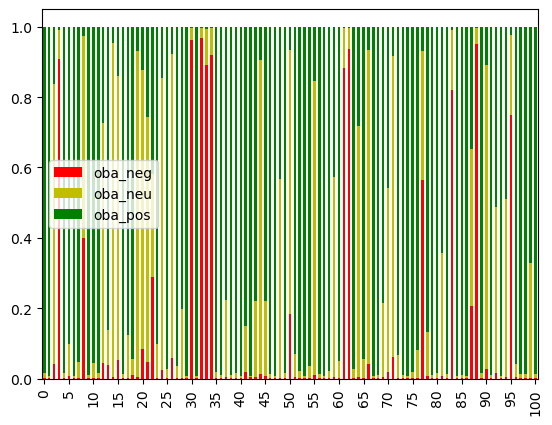

In [23]:
ax=data.plot.bar(y=['oba_neg','oba_neu','oba_pos'],stacked=True,color=['r','y','g'])
ticks=range(0,101,5)
labels=ticks
plt.xticks(ticks,labels)

In [24]:
#Looks like some speeches turn up  predominantly negative, especially speeches with index 3, 30, 32-34 -- Lets check em out!
data.iloc[30]

Unnamed: 0                                                    30
file                               2011-05-02-binLadenKilled.txt
text_oba       Good evening. Tonight, I can report to the Ame...
text_wsj       Al Qaeda leader Osama bin Laden, a mastermind ...
text_nyt       Osama bin Laden, the mastermind of the most de...
date                                                  2011-05-02
oba_results    AnalyzerOutput(output=NEG, probas={NEG: 0.962,...
oba_pos                                                 0.003345
oba_neu                                                 0.034504
oba_neg                                                 0.962151
Name: 30, dtype: object

In [25]:
#Now let's compare WSJ and NYT Article Graphs
data['wsj_results']=analyzer.predict(data['text_wsj'])
data['nyt_results']=analyzer.predict(data['text_nyt'])

data['wsj_pos']=0
data['wsj_neu']=0
data['wsj_neg']=0
for i in range(0,len(data)):
    data['wsj_pos'][i]=data['wsj_results'][i].probas.get('POS')
    data['wsj_neu'][i]=data['wsj_results'][i].probas.get('NEU')
    data['wsj_neg'][i]=data['wsj_results'][i].probas.get('NEG')

data['nyt_pos']=0
data['nyt_neu']=0
data['nyt_neg']=0
for i in range(0,len(data)):
    data['nyt_pos'][i]=data['nyt_results'][i].probas.get('POS')
    data['nyt_neu'][i]=data['nyt_results'][i].probas.get('NEU')
    data['nyt_neg'][i]=data['nyt_results'][i].probas.get('NEG')

100%|██████████| 4/4 [00:01<00:00,  2.86ba/s]
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 101
  Batch size = 32
100%|██████████| 4/4 [00:01<00:00,  2.37ba/s]
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 101
  Batch size = 32
100%|██████████| 4/4 [00:19<00:00,  4.80s/it]
C:\Users\Kylan\AppData\Local\Temp\ipykernel_22360\2626055168.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

([<matplotlib.axis.XTick at 0x279c40a8520>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55'),
  Text(60, 0, '60'),
  Text(65, 0, '65'),
  Text(70, 0, '70'),
  Text(75, 0, '75'),
  Text(80, 0, '80'),
  Text(85, 0, '85'),
  Text(90, 0, '90'),
  Text(95, 0, '95'),
  Text(100, 0, '100')])

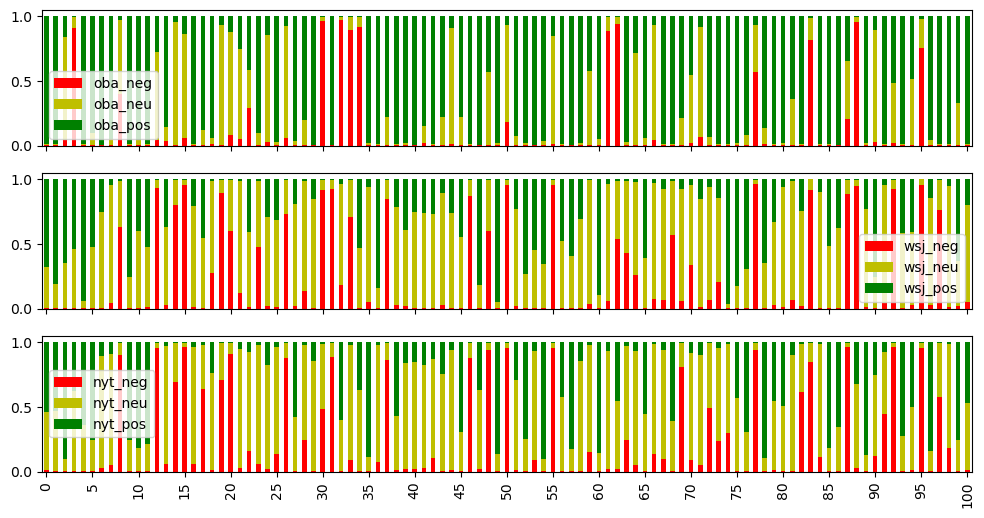

In [26]:
fig, (ax1,ax2,ax3)=plt.subplots(3,sharex=True, figsize=(12,6))
data.plot.bar(ax=ax1,y=['oba_neg','oba_neu','oba_pos'],stacked=True,color=['r','y','g'])
data.plot.bar(ax=ax2,y=['wsj_neg','wsj_neu','wsj_pos'],stacked=True,color=['r','y','g'])
data.plot.bar(ax=ax3,y=['nyt_neg','nyt_neu','nyt_pos'],stacked=True,color=['r','y','g'])
plt.xticks(ticks,labels)

As could be expected, the news articles tend to fluctuate much more between positive and negative, while the speeches themselves remain mostly positive and-or neutral. Of specific interest are the red peaks in speeches, which mostly correlate with additional negativity in their corresponding news articles (FORMAL TEST REQUIRED). The big red peak as explained earlier covers some pretty heavy topics, while speech number 4 (index 3) does not garner significant negativity in news articles and warrants further investigation.

In [27]:
#Lets check out speech no 4 and the corresponding articles.
print('Analysis result: \n Speech \t WSJ \t NYT \n',data['oba_results'][3].output,'\t\t',data['wsj_results'][3].output,'\t',data['nyt_results'][3].output)
print('Negative scores: \n','Speech','\t','WSJ','\t','NYT','\n',
    round(data['oba_neg'][3],3),'\t\t',round(data['wsj_neg'][3],3),'\t',round(data['nyt_neg'][3],3))
print('Filename: \n',data.iloc[3]['file'],'\n\n') #Seems to just be economy plans
print('Speech beginning: \n',data.iloc[3,2][0:500],'\n\n') #Indeed alot of negative words being used here
print('WSJ Article beginning: \n',data.iloc[3,3][0:500],'\n\n') #Maybe stuff like 'greater' can be seen as positive? - must check out POS-NEU scores
print('NYT Article beginning: \n',data.iloc[3,4][0:500]) #Neutral indeed

Analysis result: 
 Speech 	 WSJ 	 NYT 
 NEG 		 POS 	 NEU
Negative scores: 
 Speech 	 WSJ 	 NYT 
 0.909 		 0.004 	 0.006
Filename: 
 2009-01-05-EconomyPlans.txt 


Speech beginning: 
 All right. Well, thanks for taking the time to come in for a moment. You know, this is the core of my economic team, and the message of our meeting today is one that comes as no surprise to most Americans, and that is we are in a very difficult spot. The economy is bad. The situation is getting worse.

Last week, we learned that manufacturing had hit a 20-year low. On Friday, we're going to get the final jobs report from this year, and every indication is that we will have lost in 2008 more jobs 


WSJ Article beginning: 
 President-elect Barack Obama and congressional Democrats are crafting a plan to offer about $300 billion of tax cuts to individuals and businesses, a move aimed at attracting Republican support for an economic-stimulus package and prodding companies to create jobs.

The size of the propo

In [28]:
print(data['wsj_results'][3].probas) #yeah seems like its just barely more positive than neutral

{'NEG': 0.004140180069953203, 'NEU': 0.4565861225128174, 'POS': 0.539273738861084}


In [29]:
#Set baseline for analyzer using diverse texts (doc2vec)
#Tokenize texts for training

#Train doc2vec on oba/wsj/nyt corpus

#Identify where texts are located through the doc vector

In [30]:
data.head()

,Unnamed: 0,file,text_oba,text_wsj,text_nyt,date,oba_results,oba_pos,oba_neu,oba_neg,wsj_results,nyt_results,wsj_pos,wsj_neu,wsj_neg,nyt_pos,nyt_neu,nyt_neg
0,0,2004-07-28-DNCSpeech.txt,"On behalf of the great state of Illinois, cros...",John Kerry's decorated service in Vietnam took...,Barack Obama took the dais as the keynote spea...,2004-07-28,"AnalyzerOutput(output=POS, probas={POS: 0.984,...",0.984291,0.013740,0.001969,"AnalyzerOutput(output=POS, probas={POS: 0.679,...","AnalyzerOutput(output=POS, probas={POS: 0.538,...",0.678627,0.318330,0.003043,0.537673,0.451160,0.011166
1,1,2008-06-04-ObamaNomination.txt,Thank you....Thank you. What a -- What a wonde...,Sen. Barack Obama captured enough convention d...,Senator Barack Obama claimed the Democratic pr...,2008-06-04,"AnalyzerOutput(output=POS, probas={POS: 0.992,...",0.991954,0.006306,0.001740,"AnalyzerOutput(output=POS, probas={POS: 0.808,...","AnalyzerOutput(output=POS, probas={POS: 0.532,...",0.807944,0.189637,0.002419,0.532222,0.463911,0.003867
2,2,2008-11-05-ObamaElected.txt,"Hello, Chicago.\n\nIf there is anyone out ther...",Sen. Barack Obama was elected the nation's fir...,Barack Hussein Obama was elected the 44th pres...,2008-11-05,"AnalyzerOutput(output=NEU, probas={NEU: 0.795,...",0.164156,0.794787,0.041057,"AnalyzerOutput(output=POS, probas={POS: 0.647,...","AnalyzerOutput(output=POS, probas={POS: 0.900,...",0.646581,0.347354,0.006064,0.899753,0.097999,0.002248
3,3,2009-01-05-EconomyPlans.txt,"All right. Well, thanks for taking the time to...",President-elect Barack Obama and congressional...,President-elect Barack Obama plans to include ...,2009-01-05,"AnalyzerOutput(output=NEG, probas={NEG: 0.909,...",0.008281,0.083071,0.908647,"AnalyzerOutput(output=POS, probas={POS: 0.539,...","AnalyzerOutput(output=NEU, probas={NEU: 0.617,...",0.539274,0.456586,0.004140,0.377001,0.617145,0.005854
4,4,2009-01-20-Inauguration.txt,"I, Barack Hussein Obama, do solemnly swear tha...","On a day rich in history, Barack Obama was swo...",Barack Hussein Obama was sworn in as the 44th ...,2009-01-20,"AnalyzerOutput(output=POS, probas={POS: 0.985,...",0.984908,0.013792,0.001300,"AnalyzerOutput(output=POS, probas={POS: 0.945,...","AnalyzerOutput(output=POS, probas={POS: 0.636,...",0.944956,0.053555,0.001489,0.636215,0.355996,0.007789


In [31]:
#Reformat data to long format for use in doc2vec corpus
texts=[]
sources=[]
output=[]
date=[]
score=[]
for column in ['text_oba','text_wsj','text_nyt']:
    for i in range(0,len(data)):
        texts.append(data[column][i])
        sources.append(column)
        date.append(data['date'][i])
        
for scores in ['oba_results','wsj_results','nyt_results']:
    for i in range(0,len(data)):
        output.append(data[scores][i].output)
        if data[scores][i].output=='POS':
            score.append(1)
        elif data[scores][i].output=='NEG':
            score.append(0)
        else:
            score.append(0.5)
D2Vdata = pd.DataFrame(data={'Source':sources,'Date':date,'Text':texts,'Result':output,'Resultint':score})
print(len(D2Vdata))
D2Vdata.head()

303


,Source,Date,Text,Result,Resultint
0,text_oba,2004-07-28,"On behalf of the great state of Illinois, cros...",POS,1.0
1,text_oba,2008-06-04,Thank you....Thank you. What a -- What a wonde...,POS,1.0
2,text_oba,2008-11-05,"Hello, Chicago.\n\nIf there is anyone out ther...",NEU,0.5
3,text_oba,2009-01-05,"All right. Well, thanks for taking the time to...",NEG,0.0
4,text_oba,2009-01-20,"I, Barack Hussein Obama, do solemnly swear tha...",POS,1.0


In [32]:
D2Vdata=pd.read_csv('./Data/genData/UCSBLemmaTokens.csv')
import spacy
nlp = spacy.load("en_core_web_md")
D2Vdata['sentiment']=analyzer.predict(D2Vdata['fulltext'])
D2Vdata['tokens']=D2Vdata['tokens'].apply(lambda x: nlp(x)) #Still need to fix commas being tokenized...
D2Vdata['fulltext']=D2Vdata['fulltext'].apply(lambda x: nlp(x))

D2Vdata.head()

100%|██████████| 14/14 [00:08<00:00,  1.68ba/s]
The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 426
  Batch size = 32
100%|██████████| 14/14 [02:01<00:00,  8.71s/it]


,Unnamed: 0,date,title,tokens,fulltext,sentiment
0,0,2012-07-23,Speech to the 113th VFW Convention,"([, ', straight, ', ,, ', denoyer, ', ,, ', re...","(Thank, you, !, Hello, VFW, !, Thank, you, so,...","AnalyzerOutput(output=POS, probas={POS: 0.982,..."
1,1,2015-12-09,113th Amendment 150-Year Anniversary Speech,"([, ', white, ', ,, ', rise, ', ,, ', journey,...","(“, In, giving, freedom, to, the, slave, ,, we...","AnalyzerOutput(output=POS, probas={POS: 0.804,..."
2,2,2010-02-01,Press Conference on 2010 Budget Sent to Congress,"([, ', reflect, ', ,, ', rise, ', ,, ', energy...","(Good, morning, ,, everybody, ., , This, morn...","AnalyzerOutput(output=NEG, probas={NEG: 0.839,..."
3,3,2010-02-04,Speech at the 58th National Prayer Breakfast,"([, ', head, ', ,, ', share, ', ,, ', contest,...","(Thank, you, ., , Thank, you, very, much, ., ...","AnalyzerOutput(output=POS, probas={POS: 0.991,..."
4,4,2011-02-03,Speech at the 59th National Prayer Breakfast,"([, ', straight, ', ,, ', biblical, ', ,, ', s...","(Thank, you, so, much, ., , To, the, co, -, ...","AnalyzerOutput(output=POS, probas={POS: 0.990,..."


In [33]:
D2Vdata['final_sentiment']=0
D2Vdata['Sentint']=0
D2Vdata['pos']=0
D2Vdata['neu']=0
D2Vdata['neg']=0
for i in range(0,len(D2Vdata)):
    D2Vdata['final_sentiment'][i]=D2Vdata['sentiment'][i].output
    D2Vdata['pos'][i]=D2Vdata['sentiment'][i].probas.get('POS')
    D2Vdata['neu'][i]=D2Vdata['sentiment'][i].probas.get('NEU')
    D2Vdata['neg'][i]=D2Vdata['sentiment'][i].probas.get('NEG')
    if D2Vdata['final_sentiment'][i]=='POS':
        D2Vdata['Sentint'][i]=1
    elif D2Vdata['final_sentiment'][i]=='NEU':
        D2Vdata['Sentint'][i]=0.5
    else:
     D2Vdata['Sentint'][i]=0

C:\Users\Kylan\AppData\Local\Temp\ipykernel_22360\3994392056.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kylan\AppData\Local\Temp\ipykernel_22360\3994392056.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kylan\AppData\Local\Temp\ipykernel_22360\3994392056.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Kylan\AppData\Local\Temp\ipykernel_22360\3994392056.py:10: SettingWithCopyWarning:


A valu

In [34]:
D2Vdata.head(20)


,Unnamed: 0,date,title,tokens,fulltext,sentiment,final_sentiment,Sentint,pos,neu,neg
0,0,2012-07-23,Speech to the 113th VFW Convention,"([, ', straight, ', ,, ', denoyer, ', ,, ', re...","(Thank, you, !, Hello, VFW, !, Thank, you, so,...","AnalyzerOutput(output=POS, probas={POS: 0.982,...",POS,1.0,0.981910,0.015772,0.002318
1,1,2015-12-09,113th Amendment 150-Year Anniversary Speech,"([, ', white, ', ,, ', rise, ', ,, ', journey,...","(“, In, giving, freedom, to, the, slave, ,, we...","AnalyzerOutput(output=POS, probas={POS: 0.804,...",POS,1.0,0.803675,0.186749,0.009576
2,2,2010-02-01,Press Conference on 2010 Budget Sent to Congress,"([, ', reflect, ', ,, ', rise, ', ,, ', energy...","(Good, morning, ,, everybody, ., , This, morn...","AnalyzerOutput(output=NEG, probas={NEG: 0.839,...",NEG,0.0,0.008817,0.152427,0.838756
3,3,2010-02-04,Speech at the 58th National Prayer Breakfast,"([, ', head, ', ,, ', share, ', ,, ', contest,...","(Thank, you, ., , Thank, you, very, much, ., ...","AnalyzerOutput(output=POS, probas={POS: 0.991,...",POS,1.0,0.990950,0.007672,0.001377
4,4,2011-02-03,Speech at the 59th National Prayer Breakfast,"([, ', straight, ', ,, ', biblical, ', ,, ', s...","(Thank, you, so, much, ., , To, the, co, -, ...","AnalyzerOutput(output=POS, probas={POS: 0.990,...",POS,1.0,0.989777,0.008931,0.001292
5,5,2011-04-26,Announcement of 2012 Presidential Candidacy,"([, ', forward, ', ,, ', feel, ', ,, ', involv...","(I, will, be, a, candidate, for, reelection, i...","AnalyzerOutput(output=NEU, probas={NEU: 0.852,...",NEU,0.5,0.094328,0.851955,0.053717
6,6,2014-02-06,Speech at the 62nd National Prayer Breakfast,"([, ', reflect, ', ,, ', head, ', ,, ', americ...","(Thank, you, ., , Please, ,, everyone, have,...","AnalyzerOutput(output=POS, probas={POS: 0.987,...",POS,1.0,0.987442,0.011264,0.001293
7,7,2015-02-05,Speech at the 63rd National Prayer Breakfast,"([, ', reflect, ', ,, ', white, ', ,, ', few, ...","(Thank, you, very, much, ., , Please, ,, ple...","AnalyzerOutput(output=POS, probas={POS: 0.993,...",POS,1.0,0.992774,0.005220,0.002005
8,8,2016-02-04,Speech at the 64th National Prayer Breakfast,"([, ', reflect, ', ,, ', head, ', ,, ', share,...","(Well, ,, good, morning, ., Giving, all, prais...","AnalyzerOutput(output=POS, probas={POS: 0.984,...",POS,1.0,0.984348,0.012836,0.002816
9,9,2016-11-09,Remarks on the U.S. Presidential Election Outcome,"([, ', straight, ', ,, ', line, ', ,, ', forwa...","(Good, afternoon, ,, everybody, ., Yesterday, ...","AnalyzerOutput(output=POS, probas={POS: 0.654,...",POS,1.0,0.654493,0.343470,0.002037


In [55]:
fig=px.bar(D2Vdata,x=D2Vdata.index,y=['pos','neu','neg'],color_discrete_sequence=['green','yellow','red'],title='Sentiment scores for Obama\'s speeches, ordered by date',labels={'value':'Score','index':'Index','variable':'Sentiment'})
fig.update_traces(width=1.2)
fig.show()
fig.write_image("./plots/Obama_sentiment.pdf", format='pdf')

In [36]:
#Clean up text, train-test split(MIGHT NEED REVIEW), tokenize using nltk + tag set of tokens by sentiment score 
from sklearn.model_selection import train_test_split
from gensim.models.doc2vec import TaggedDocument

x_train, x_test, y_train, y_test = train_test_split(D2Vdata, D2Vdata['Sentint'], test_size=0.3, random_state=42, shuffle=True)
x_all = D2Vdata
def fix_tokens(tokenlist):
    correcttokens=[]
    for token in tokenlist:
        if len(token)>2:
            correcttokens.append(str(token))
        else:
            pass
    return correcttokens

all_tagged = x_all.apply(
    lambda r: TaggedDocument(words=fix_tokens(r['fulltext']), tags=[r['title']]), axis=1)
train_tagged = x_train.apply(
    lambda r: TaggedDocument(words=fix_tokens(r['fulltext']), tags=[r['title']]), axis=1)
test_tagged = x_test.apply(
    lambda r: TaggedDocument(words=fix_tokens(r['fulltext']), tags=[r['title']]), axis=1)

In [37]:
#Initialize doc2vec DBOW model
import multiprocessing
cores=multiprocessing.cpu_count()
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample=0, workers=cores)
model_dbow.build_vocab([x for x in all_tagged.values])
model_dm = Doc2Vec(dm=1, vector_size=300, negative=5, hs=0, min_count=2, sample=0, workers=cores)
model_dm.build_vocab([x for x in all_tagged.values])

In [38]:
#Train model for 50 epochs
from sklearn import utils
for i in range(50):
    model_dbow.train(utils.shuffle([x for x in all_tagged.values]), total_examples=len(all_tagged.values),epochs=1)
    model_dbow.alpha=-0.002
    model_dbow.min_alpha=model_dbow.alpha
    model_dm.train(utils.shuffle([x for x in all_tagged.values]), total_examples=len(all_tagged.values),epochs=1)
    model_dm.alpha=-0.002
    model_dm.min_alpha=model_dm.alpha

In [39]:
print(model_dbow.wv.most_similar('Obama'))
print(model_dbow.wv.most_similar('America'))
print(model_dbow.wv.most_similar('education'))
print(model_dbow.wv.most_similar('war'))
print(model_dbow.wv.most_similar('president'))

[('Lilly', 0.246506467461586), ('compels', 0.23355937004089355), ('fairly', 0.21797576546669006), ('Assistant', 0.20348632335662842), ('medicine', 0.19897353649139404), ('robotics', 0.19587761163711548), ('stone', 0.19359806180000305), ('Ravenstahl', 0.19113950431346893), ('infant', 0.19075211882591248), ('wrangling', 0.18891564011573792)]
[('abused', 0.21076257526874542), ('fusion', 0.20825524628162384), ('Put', 0.20789891481399536), ('lessen', 0.20533142983913422), ('jailer', 0.2000654637813568), ('Protestants', 0.1937597543001175), ('picture', 0.1895957738161087), ('relative', 0.18787528574466705), ('locate', 0.18610002100467682), ('Microsoft', 0.17862237989902496)]
[('Brostrom', 0.25030362606048584), ('Party', 0.20104603469371796), ('paint', 0.199672132730484), ('hop', 0.1928839534521103), ('anchor', 0.192011296749115), ('McFaul', 0.19182194769382477), ('structured', 0.1916857659816742), ('starting', 0.1897502988576889), ('violated', 0.18870487809181213), ('unequal', 0.188315242528

In [40]:
print(model_dm.wv.most_similar('Obama'))
print(model_dm.wv.most_similar('America'))
print(model_dm.wv.most_similar('education'))
print(model_dm.wv.most_similar('war'))
print(model_dm.wv.most_similar('president'))

[('also', 0.9987399578094482), ('said', 0.9986889362335205), ('now', 0.9986699223518372), ('blame', 0.9985457062721252), ('few', 0.9985356330871582), ('Catholic', 0.9983272552490234), ('when', 0.9983096122741699), ('one', 0.9982591271400452), ('described', 0.9981095790863037), ('finally', 0.9980984926223755)]
[('President', 0.9952265024185181), ('rare', 0.994889497756958), ('this', 0.9945536851882935), ('remains', 0.9944958090782166), ('years', 0.9940796494483948), ('readers', 0.9939668774604797), ('the', 0.9938463568687439), ('year', 0.9938306212425232), ('months', 0.9937211275100708), ('grade', 0.9936901926994324)]
[('ideas', 0.9991230964660645), ('training', 0.999071478843689), ('society', 0.9989088773727417), ('schools', 0.9986392855644226), ('settled', 0.9986258149147034), ('barriers', 0.9986015558242798), ('disease', 0.9985963702201843), ('live', 0.9983645081520081), ('competition', 0.9982959032058716), ('Aurora', 0.9982931017875671)]
[('larger', 0.9993544816970825), ('federal', 

In [41]:
import numpy as np
from sklearn.preprocessing import scale
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x.words for x in all_tagged])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
def build_doc_Vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_dbow[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: 
            continue
    if count != 0:
        vec /= count
    return vec

train_vecs_dbow = np.concatenate([build_doc_Vector(z, 300) for z in map(lambda x: x.words, train_tagged)])
train_vecs_dbow = scale(train_vecs_dbow)
val_vecs_dbow = np.concatenate([build_doc_Vector(z, 300) for z in map(lambda x: x.words, test_tagged)])
val_vecs_dbow = scale(val_vecs_dbow)

model1 = Sequential()
model1.add(Dense(256, activation='relu', input_dim=300))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(train_vecs_dbow, y_train, epochs=100, batch_size=32, verbose=2)
score = model1.evaluate(val_vecs_dbow, y_test, batch_size=128, verbose=2)
print(score[1])

c:\Users\Kylan\anaconda3\envs\blauwe_kater\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Epoch 1/100
10/10 - 1s - loss: 0.4749 - accuracy: 0.7785 - 736ms/epoch - 74ms/step
Epoch 2/100
10/10 - 0s - loss: 0.2783 - accuracy: 0.8322 - 25ms/epoch - 3ms/step
Epoch 3/100
10/10 - 0s - loss: 0.1902 - accuracy: 0.8490 - 25ms/epoch - 3ms/step
Epoch 4/100
10/10 - 0s - loss: 0.1327 - accuracy: 0.8826 - 24ms/epoch - 2ms/step
Epoch 5/100
10/10 - 0s - loss: 0.1049 - accuracy: 0.8859 - 27ms/epoch - 3ms/step
Epoch 6/100
10/10 - 0s - loss: 0.0941 - accuracy: 0.8859 - 22ms/epoch - 2ms/step
Epoch 7/100
10/10 - 0s - loss: 0.0998 - accuracy: 0.8859 - 24ms/epoch - 2ms/step
Epoch 8/100
10/10 - 0s - loss: 0.1069 - accuracy: 0.8859 - 22ms/epoch - 2ms/step
Epoch 9/100
10/10 - 0s - loss: 0.0987 - accuracy: 0.8859 - 27ms/epoch - 3ms/step
Epoch 10/100
10/10 - 0s - loss: 0.0930 - accuracy: 0.8859 - 23ms/epoch - 2ms/step
Epoch 11/100
10/10 - 0s - loss: 0.0947 - accuracy: 0.8859 - 24ms/epoch - 2ms/step
Epoch 12/100
10/10 - 0s - loss: 0.0874 - accuracy: 0.8859 - 23ms/epoch - 2ms/step
Epoch 13/100
10/10 - 0s

In [42]:
model_dmc = Doc2Vec(dm=1, dm_concat=1, vector_size=200, window=2, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_dmc.build_vocab([x for x in (all_tagged)])
model_dmc.train(utils.shuffle([x for x in (all_tagged)]), total_examples=len(all_tagged), epochs=1)

def build_doc_Vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_dmc[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: 
            continue
    if count != 0:
        vec /= count
    return vec

  
train_vecs_dmc = np.concatenate([build_doc_Vector(z, 200) for z in map(lambda x: x.words, train_tagged)])
train_vecs_dmc = scale(train_vecs_dmc)


val_vecs_dmc = np.concatenate([build_doc_Vector(z, 200) for z in map(lambda x: x.words, test_tagged)])
val_vecs_dmc = scale(val_vecs_dmc)

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=200))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_vecs_dmc, y_train, epochs=100, batch_size=32, verbose=2)
score = model.evaluate(val_vecs_dmc, y_test, batch_size=128, verbose=2)

print(score[1])

Epoch 1/100
10/10 - 1s - loss: 0.4321 - accuracy: 0.8087 - 570ms/epoch - 57ms/step
Epoch 2/100
10/10 - 0s - loss: 0.2971 - accuracy: 0.8188 - 21ms/epoch - 2ms/step
Epoch 3/100
10/10 - 0s - loss: 0.2366 - accuracy: 0.8356 - 25ms/epoch - 3ms/step
Epoch 4/100
10/10 - 0s - loss: 0.1932 - accuracy: 0.8658 - 23ms/epoch - 2ms/step
Epoch 5/100
10/10 - 0s - loss: 0.1611 - accuracy: 0.8758 - 23ms/epoch - 2ms/step
Epoch 6/100
10/10 - 0s - loss: 0.1359 - accuracy: 0.8826 - 20ms/epoch - 2ms/step
Epoch 7/100
10/10 - 0s - loss: 0.1362 - accuracy: 0.8792 - 25ms/epoch - 3ms/step
Epoch 8/100
10/10 - 0s - loss: 0.1130 - accuracy: 0.8826 - 23ms/epoch - 2ms/step
Epoch 9/100
10/10 - 0s - loss: 0.1043 - accuracy: 0.8859 - 22ms/epoch - 2ms/step
Epoch 10/100
10/10 - 0s - loss: 0.1134 - accuracy: 0.8859 - 22ms/epoch - 2ms/step
Epoch 11/100
10/10 - 0s - loss: 0.1097 - accuracy: 0.8859 - 25ms/epoch - 3ms/step
Epoch 12/100
10/10 - 0s - loss: 0.1015 - accuracy: 0.8859 - 23ms/epoch - 2ms/step
Epoch 13/100
10/10 - 0s

In [43]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in all_tagged])
model_dmm.train(utils.shuffle([x for x in all_tagged]), total_examples=len(all_tagged), epochs=1)

def build_doc_Vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_dmm[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: 
            continue
    if count != 0:
        vec /= count
    return vec

  
train_vecs_dmm = np.concatenate([build_doc_Vector(z, 300) for z in (map(lambda x: x.words, train_tagged))])
train_vecs_dmm = scale(train_vecs_dmm)

val_vecs_dmm = np.concatenate([build_doc_Vector(z, 300) for z in (map(lambda x: x.words, test_tagged))])
val_vecs_dmm = scale(val_vecs_dmm)

model2 = Sequential()
model2.add(Dense(256, activation='relu', input_dim=300))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.fit(train_vecs_dmm, y_train, epochs=100, batch_size=32, verbose=2)
score = model2.evaluate(val_vecs_dmm, y_test, batch_size=128, verbose=2)
print(score[1])

Epoch 1/100
10/10 - 1s - loss: 0.4600 - accuracy: 0.7987 - 566ms/epoch - 57ms/step
Epoch 2/100
10/10 - 0s - loss: 0.3375 - accuracy: 0.8054 - 23ms/epoch - 2ms/step
Epoch 3/100
10/10 - 0s - loss: 0.3121 - accuracy: 0.8188 - 22ms/epoch - 2ms/step
Epoch 4/100
10/10 - 0s - loss: 0.2628 - accuracy: 0.8423 - 26ms/epoch - 3ms/step
Epoch 5/100
10/10 - 0s - loss: 0.2380 - accuracy: 0.8456 - 21ms/epoch - 2ms/step
Epoch 6/100
10/10 - 0s - loss: 0.2131 - accuracy: 0.8490 - 23ms/epoch - 2ms/step
Epoch 7/100
10/10 - 0s - loss: 0.1824 - accuracy: 0.8658 - 23ms/epoch - 2ms/step
Epoch 8/100
10/10 - 0s - loss: 0.1723 - accuracy: 0.8691 - 25ms/epoch - 3ms/step
Epoch 9/100
10/10 - 0s - loss: 0.1462 - accuracy: 0.8792 - 22ms/epoch - 2ms/step
Epoch 10/100
10/10 - 0s - loss: 0.1499 - accuracy: 0.8725 - 25ms/epoch - 3ms/step
Epoch 11/100
10/10 - 0s - loss: 0.1573 - accuracy: 0.8658 - 22ms/epoch - 2ms/step
Epoch 12/100
10/10 - 0s - loss: 0.1352 - accuracy: 0.8758 - 23ms/epoch - 2ms/step
Epoch 13/100
10/10 - 0s

In [44]:
#T-SNE visualization of doc2vec model for further investigation
from sklearn.manifold import TSNE
import numpy as np
#word='heroic'
#wv=model_d2v.wv[word]
doc_tags=list(model_dm.dv.index_to_key)
#doc_tags.append(word)
#wv=model_dbow.wv[word]
X=np.zeros((len(model_dm.dv.index_to_key),len(model_dm.dv[0])))
#X2=np.zeros((len(model_d2v.dv.index_to_key),len(model_d2v.dv[0])))
for i in range(0,len(X)):
    X[i]=model_dm.dv[i]
#for i in range(0,len(X2)):
#    X2[i]=model_d2v.dv[i]

In [45]:
tsne=TSNE(n_components=2,random_state=47)
X_tsne=tsne.fit_transform(X)
df=pd.DataFrame(X_tsne,index=doc_tags,columns=['x','y'])
df.head()
#X2_tsne=tsne.fit_transform(X2)
#df2=pd.DataFrame(X2_tsne,index=doc_tags[:-1],columns=['x','y'])

c:\Users\Kylan\anaconda3\envs\blauwe_kater\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\Kylan\anaconda3\envs\blauwe_kater\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



,x,y
Speech to the 113th VFW Convention,0.374577,12.578154
113th Amendment 150-Year Anniversary Speech,-10.809106,13.254510
Press Conference on 2010 Budget Sent to Congress,-2.004433,10.701060
Speech at the 58th National Prayer Breakfast,6.060926,6.825216
Speech at the 59th National Prayer Breakfast,-3.432511,9.180293


In [46]:
df['Sentiment']=0
df['Source']=df.index
for i in range(0,len(df)):
    df['Sentiment'][i]=D2Vdata['final_sentiment'][i]
df.head()

C:\Users\Kylan\AppData\Local\Temp\ipykernel_22360\2070892238.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,x,y,Sentiment,Source
Speech to the 113th VFW Convention,0.374577,12.578154,POS,Speech to the 113th VFW Convention
113th Amendment 150-Year Anniversary Speech,-10.809106,13.254510,POS,113th Amendment 150-Year Anniversary Speech
Press Conference on 2010 Budget Sent to Congress,-2.004433,10.701060,NEG,Press Conference on 2010 Budget Sent to Congress
Speech at the 58th National Prayer Breakfast,6.060926,6.825216,POS,Speech at the 58th National Prayer Breakfast
Speech at the 59th National Prayer Breakfast,-3.432511,9.180293,POS,Speech at the 59th National Prayer Breakfast


In [47]:
fig = px.scatter(df, 
             x='x', 
             y="y",
             color='Sentiment',
             color_discrete_sequence=['green','yellow','red'],
             labels={'x':'T-SNE Dimension 1', 'y':'T-SNE Dimension 2'},
             title='T-SNE visualisation of Vector Embeddings',
             hover_name=df.index)
fig.show()
fig.write_image("./plots/TSNE.pdf", format='pdf')

In [50]:
D2Vdata.query('Source == "text_nyt" & Date == "2011-02-19"')

UndefinedVariableError: name 'Source' is not defined

#### Everything after this point is earlier messing around with the new Sentence Embedding model combined with sentimiento on each sentence, but the results from just analyzing the entire speech itself are much more promising

In [ ]:
#Split speeches into sentences
scores=[]
labels=[]
speech=tokenize.sent_tokenize(data.iloc[0,2])
for sentence in range(0,len(speech)):
    scores.append(model(speech[sentence],batch_size=8,truncation='only_first')[0].get('score'))
    labels.append(model(speech[sentence],batch_size=8,truncation='only_first')[0].get('label'))

In [ ]:
for list in zip(scores,labels):
        print(list)
#These are the results for all sentences in one speech using embeddings and pipeline